Problem #1

In [98]:
import pandas as pd 

#read in csv
df_init = pd.read_csv("MetObjects_Subset.csv")

Problem #2

In [99]:
#create a copy of df that contains true/false for empty/not empty
dfEmptyCheck = df_init.isna()
colListToDrop = []

#iterate through the columns of the df
for col in dfEmptyCheck:
    #check if there are at least as many empty values than filled, and add to list
     if ((dfEmptyCheck[col]==True).sum() >= (dfEmptyCheck[col]==False).sum()):
        colListToDrop.append(col)

#drop the list of values from the df to create new one
df_prob2 = df_init.drop(colListToDrop, axis=1)

Problem #3

In [100]:
#Create a list of the top 10 name by occurance in the Object Name column
listOfTopTenObjectNames = df_prob2['Object Name'].value_counts()[:10].index.tolist()
#Create dataframe with only those rows that match the values in the list
df_prob3 = df_prob2[df_prob2['Object Name'].isin(listOfTopTenObjectNames)]

Problem #4

In [101]:
#problem 4
import numpy as np

#create the dict
dict_prob4= {"United States": 0.0, "Mexico": 0.0, "Canada": 0.0, "Other": 0.0}
#create a list for names and for values, easy to track this way
acceptedCountries = ["United States", "Mexico", "Canada", "Other"]
occuranceList = [0, 0, 0, 0] 

#iterate through countires
for data in df_prob3["Country"]:
    #if it's one of the 4 valid, count it at that index
    if data in acceptedCountries:
        occuranceList[acceptedCountries.index(data)] += 1
    #otherwise, count as other
    else:
        occuranceList[3] += 1

#sum the total countries to calculate percent
totalCountries = sum(occuranceList)

#update the dict with correcet percents
for key in dict_prob4:
    dict_prob4[key] = np.round(100*occuranceList[acceptedCountries.index(key)]/totalCountries, decimals=2)

Problem #5

In [102]:
dict_prob5 = {"1900s": 0, "1910s": 0,"1920s": 0,"1930s": 0,"1940s": 0,"1950s": 0,"1960s": 0,"1970s": 0,"1980s": 0,"1990s": 0}

#iterate through end dates
for data in df_prob3["Object End Date"]:
    if data >= 1900 and data < 2000:
        #convert value into single number, then to string
        decade = int((data%1900)/ 10)
        key = "19" + str(decade) + "0s"
        #count it
        dict_prob5[key] += 1

Problem #6

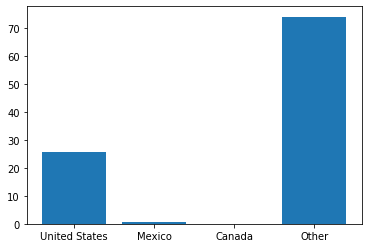

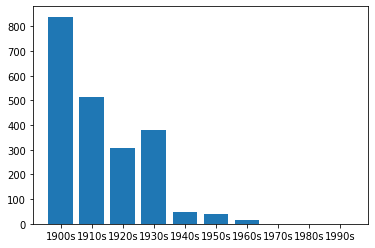

In [103]:
#graph time
import matplotlib.pyplot as plt
# a function could be made here to simplifiy this, but kept seperate since
#i wans't sure how it would be graded
#print problem 4
plt.bar(x=dict_prob4.keys(), height=list(dict_prob4.values()))
plt.show()

#print problem 5
plt.bar(x=dict_prob5.keys(), height=list(dict_prob5.values()))
plt.show()